In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize

## Survival Rate

In [2]:
try:
    df_survival_rate = pd.read_csv('C:/Users/user/OneDrive/Documents/GitHub/TSDN-BoyWithLuv/Source/Data/front_service_1.csv')
except FileNotFoundError:
    try:
        df_survival_rate = pd.read_csv('C:/Users/user/OneDrive/Documents/GitHub/TSDN-BoyWithLuv/Source/Data/front_service_1.csv')
    except FileNotFoundError:
        try:
            df_survival_rate = pd.read_csv('C:\\Users\\Republic Of Gamers\\OneDrive\\Documents\\GitHub\\TSDN-BoyWithLuv\\Source\\Data\\front_service_1.csv')
        except FileNotFoundError:
            df_survival_rate = None
            print("Error: Model file not found in all paths.")

In [3]:
df_survival_rate

,death,hospdead,sfdm2,age,sex,dzgroup,dzclass,num.co,edu,income,...,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,adlsc
0,0,0,NaN,62.84998,male,Lung Cancer,Cancer,0,11.0,$11-$25k,...,0.199982,1.199951,141.0,7.459961,NaN,NaN,NaN,7.0,7.0,7.000000
1,1,1,<2 mo. follow-up,60.33899,female,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,$11-$25k,...,NaN,5.500000,132.0,7.250000,NaN,NaN,NaN,NaN,1.0,1.000000
2,1,0,<2 mo. follow-up,52.74698,female,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,under $11k,...,2.199707,2.000000,134.0,7.459961,NaN,NaN,NaN,1.0,0.0,0.000000
3,1,0,no(M2 and SIP pres),42.38498,female,Lung Cancer,Cancer,2,11.0,under $11k,...,NaN,0.799927,139.0,NaN,NaN,NaN,NaN,0.0,0.0,0.000000
4,0,0,no(M2 and SIP pres),79.88495,female,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,NaN,...,NaN,0.799927,143.0,7.509766,NaN,NaN,NaN,NaN,2.0,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9100,0,0,NaN,66.07300,male,ARF/MOSF w/Sepsis,ARF/MOSF,1,8.0,NaN,...,0.399963,1.099854,131.0,7.459961,188.0,21.0,NaN,NaN,0.0,0.000000
9101,0,0,NaN,55.15399,female,Coma,Coma,1,11.0,NaN,...,NaN,5.899414,135.0,7.289062,190.0,49.0,0.0,NaN,0.0,0.000000
9102,0,0,NaN,70.38196,male,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,NaN,...,0.399963,2.699707,139.0,7.379883,189.0,60.0,3900.0,NaN,NaN,2.525391
9103,1,1,<2 mo. follow-up,47.01999,male,MOSF w/Malig,ARF/MOSF,1,13.0,NaN,...,0.399963,3.500000,135.0,7.469727,246.0,55.0,NaN,NaN,0.0,0.000000


In [4]:
df_survival_rate.rename(columns={
    'death':'death_outside_hospital',
    'hospdead':'death_inside_hospital',
    'age': 'age_years',
    'sex': 'gender',
    'dzgroup': 'disease_group',
    'dzclass': 'disease_class',
    'num.co': 'num_comorbidities',
    'edu': 'education_years',
    'income': 'income_range',
    'scoma': 'coma_score',
    'charges': 'hospital_charges',
    'totcst': 'total_cost_to_charges_ratio',
    'totmcst': 'total_micro_cost',
    'avtisst': 'avg_tiss_score',
    'race': 'race_ethnicity',
    'sps': 'support_physiology_score',
    'aps': 'apache_score',
    'surv2m': 'survival_2_months',
    'surv6m': 'survival_6_months',
    'hday': 'hospital_day_of_study_entry',
    'diabetes': 'has_diabetes',
    'dementia': 'has_dementia',
    'ca': 'cancer_status',
    'prg2m': 'physician_survival_2_months',
    'prg6m': 'physician_survival_6_months',
    'dnr': 'do_not_resuscitate_status',
    'dnrday': 'day_of_dnr_order',
    'meanbp': 'mean_arterial_bp',
    'wblc': 'white_blood_cell_count',
    'hrt': 'heart_rate',
    'resp': 'respiratory_rate',
    'temp': 'body_temperature_celsius',
    'pafi': 'pao2_fio2_ratio',
    'alb': 'serum_albumin',
    'bili': 'bilirubin_level',
    'crea': 'serum_creatinine',
    'sod': 'serum_sodium',
    'ph': 'blood_ph',
    'glucose': 'glucose_level',
    'bun': 'blood_urea_nitrogen',
    'urine': 'urine_output',
    'adlp': 'adl_index_patient',
    'adls': 'adl_index_surrogate',
    'sfdm2': 'functional_disability_level',
    'adlsc': 'calibrated_adl_index_surrogate'
}, inplace=True)

In [5]:
df_survival_rate['age_years'] = df_survival_rate['age_years'].astype(int)

In [6]:
df_survival_rate['death'] = ((df_survival_rate['death_outside_hospital'] == 1) | (df_survival_rate['death_inside_hospital'] == 1)).astype(int)

In [7]:
survival_df_copy = df_survival_rate.copy()

In [8]:
df_survival_rate['death'] = df_survival_rate['death'].replace({0: 'No', 1: 'Yes'})

c:\Users\Republic Of Gamers\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Republic Of Gamers\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Republic Of Gamers\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.

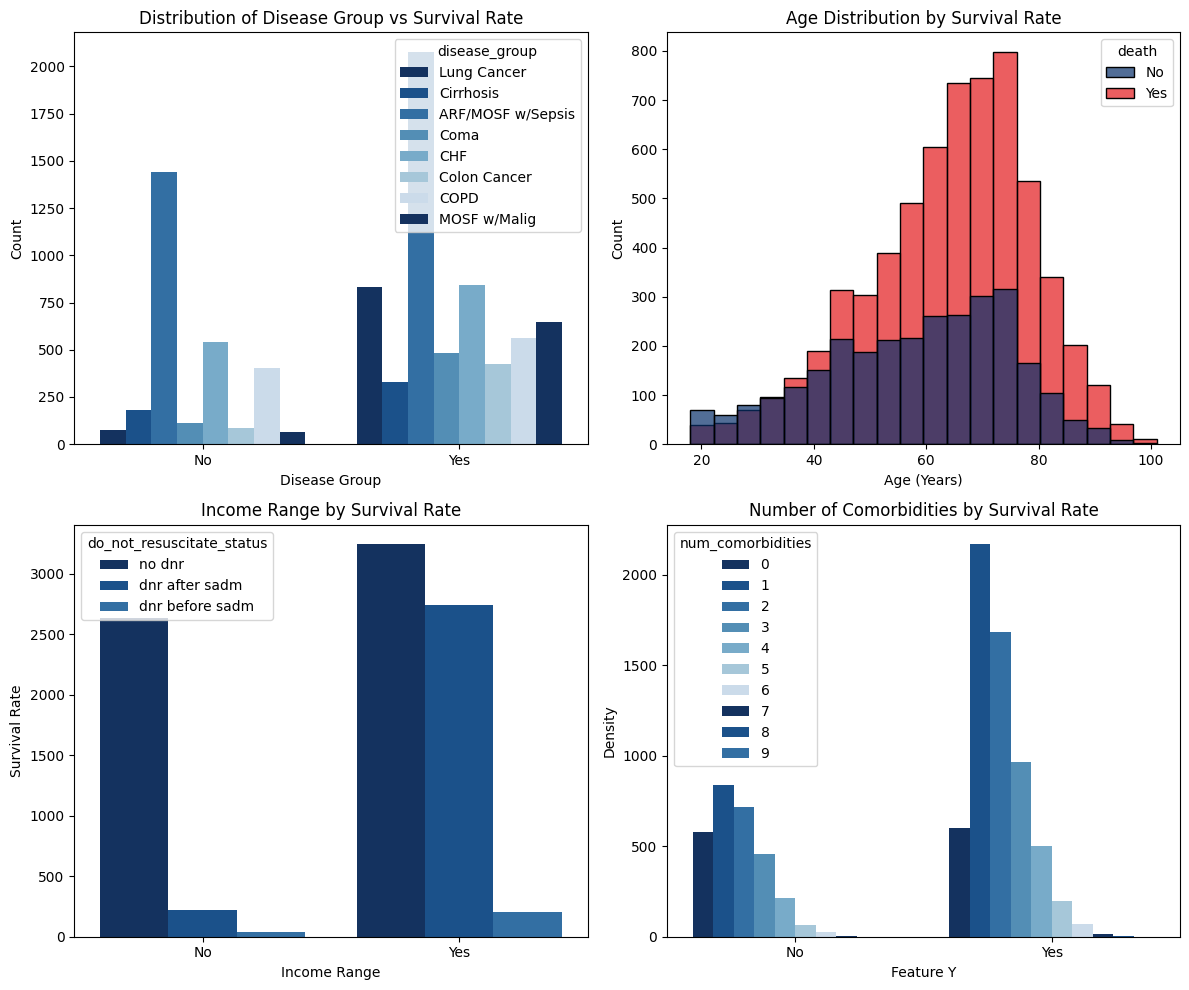

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

dark_blue_palette = ['#08306b', '#08519c', '#2171b5', '#4292c6', '#6baed6', '#9ecae1', '#c6dbef']

# Plot 1: Distribution of Disease Group against Survival Rate
sns.countplot(ax=axes[0, 0], data=df_survival_rate, x='death',hue='disease_group',palette=dark_blue_palette)
axes[0, 0].set_title('Distribution of Disease Group vs Survival Rate')
axes[0, 0].set_xlabel('Disease Group')
axes[0, 0].set_ylabel('Count')

custom_palette = {
    'No': '#008000',  # Dark Blue for 'death' = 0
    'Yes': '#e31a1c'   # Dark Red for 'death' = 1
}

# Plot 2: Histogram of Death vs Age
sns.histplot(ax=axes[0, 1], data=df_survival_rate, x='age_years', hue='death', kde=False, bins=20, palette=custom_palette, alpha=0.7)
axes[0, 1].set_title('Age Distribution by Survival Rate')
axes[0, 1].set_xlabel('Age (Years)')
axes[0, 1].set_ylabel('Count')

# Plot 3: Random example plot 2 (Replace with actual plot logic)
sns.countplot(ax=axes[1, 0], data=df_survival_rate, x='death', hue='do_not_resuscitate_status', palette = dark_blue_palette)
axes[1, 0].set_title('Income Range by Survival Rate')
axes[1, 0].set_xlabel('Income Range')
axes[1, 0].set_ylabel('Survival Rate')

# Plot 4: Random example plot 3 (Replace with actual plot logic)
sns.countplot(ax=axes[1, 1], data=df_survival_rate, x='death', hue='num_comorbidities', palette= dark_blue_palette)
axes[1, 1].set_title('Number of Comorbidities by Survival Rate')
axes[1, 1].set_xlabel('Feature Y')
axes[1, 1].set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

In [10]:
features = survival_df_copy[['death','age_years', 'gender', 'num_comorbidities', 'has_diabetes', 'has_dementia', 'cancer_status',
    'functional_disability_level', 'coma_score', 'support_physiology_score', 'apache_score',
    'mean_arterial_bp', 'heart_rate', 'respiratory_rate', 'body_temperature_celsius',
    'serum_sodium', 'serum_creatinine', 'do_not_resuscitate_status','disease_group']]

In [11]:
features['do_not_resuscitate_status'] = features['do_not_resuscitate_status'].fillna("None")

C:\Users\Republic Of Gamers\AppData\Local\Temp\ipykernel_17228\1561099195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['do_not_resuscitate_status'] = features['do_not_resuscitate_status'].fillna("None")


In [12]:
features = features.dropna()

In [13]:
# Separate the majority and minority classes
death_majority_class= features[features['death'] == 1]
death_minority_class = features[features['death'] == 0]

# Undersample the majority class
death_majority_class_undersampled = death_majority_class.sample(n=len(death_minority_class), random_state=42)

# Combine the undersampled majority class with the minority class
death_undersampled_df = pd.concat([death_majority_class_undersampled, death_minority_class], axis=0)

# Shuffle the dataset
death_undersampled_df= death_undersampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the class distribution after undersampling
print(death_undersampled_df['death'].value_counts())

death
1    2298
0    2298
Name: count, dtype: int64


In [19]:
death_undersampled_df['death'] = death_undersampled_df['death'].replace({0: 'No', 1: 'Yes'})

c:\Users\Republic Of Gamers\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Republic Of Gamers\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Republic Of Gamers\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.

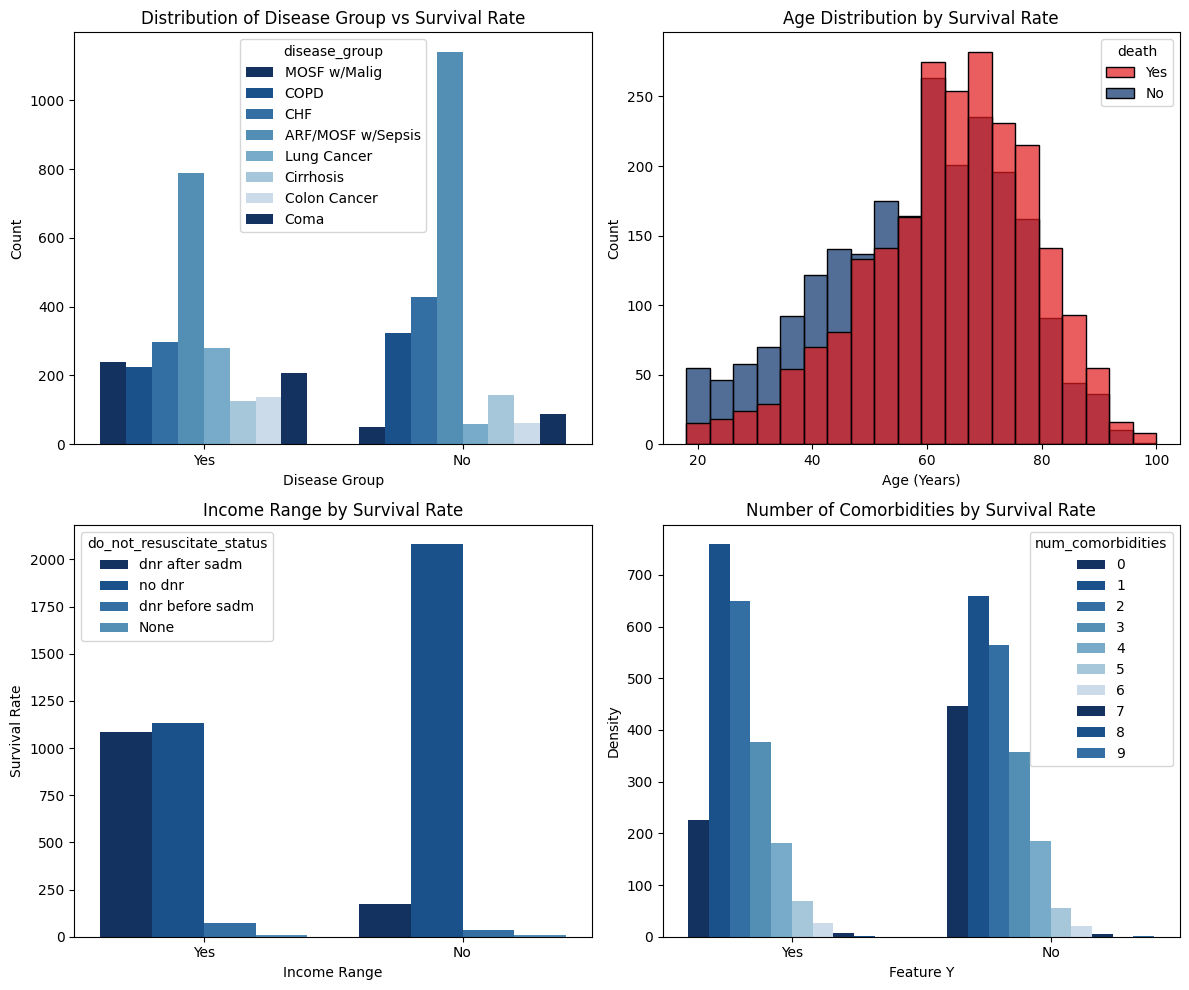

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
dark_blue_palette = ['#08306b', '#08519c', '#2171b5', '#4292c6', '#6baed6', '#9ecae1', '#c6dbef']
custom_palette = {
    'No': '#008000',  # Dark Blue for 'death' = 0
    'Yes': '#e31a1c'   # Dark Red for 'death' = 1
}

# Plot 1: Distribution of Disease Group against Survival Rate
sns.countplot(ax=axes[0, 0], data=death_undersampled_df, x='death',hue='disease_group', palette= dark_blue_palette)
axes[0, 0].set_title('Distribution of Disease Group vs Survival Rate')
axes[0, 0].set_xlabel('Disease Group')
axes[0, 0].set_ylabel('Count')

# Plot 2: Histogram of Death vs Age
sns.histplot(ax=axes[0, 1], data=death_undersampled_df, x='age_years', hue='death', kde=False, bins=20, palette=custom_palette, alpha=0.7)
axes[0, 1].set_title('Age Distribution by Survival Rate')
axes[0, 1].set_xlabel('Age (Years)')
axes[0, 1].set_ylabel('Count')

# Plot 3: Random example plot 2 (Replace with actual plot logic)
sns.countplot(ax=axes[1, 0], data=death_undersampled_df, x='death', hue='do_not_resuscitate_status', palette=dark_blue_palette)
axes[1, 0].set_title('Income Range by Survival Rate')
axes[1, 0].set_xlabel('Income Range')
axes[1, 0].set_ylabel('Survival Rate')

# Plot 4: Random example plot 3 (Replace with actual plot logic)
sns.countplot(ax=axes[1, 1], data=death_undersampled_df, x='death', hue='num_comorbidities', palette=dark_blue_palette)
axes[1, 1].set_title('Number of Comorbidities by Survival Rate')
axes[1, 1].set_xlabel('Feature Y')
axes[1, 1].set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

## Surgery Risk

In [2]:
try:
    df_surgery_risk = pd.read_csv('C:/Users/user/OneDrive/Documents/GitHub/TSDN-BoyWithLuv/Source/Data/surgery_record.csv')
except FileNotFoundError:
    try:
        df_surgery_risk = pd.read_csv('C:/Users/user/OneDrive/Documents/GitHub/TSDN-BoyWithLuv/Source/Data/surgery_record.csv')
    except FileNotFoundError:
        try:
            df_surgery_risk = pd.read_csv('C:\\Users\\Republic Of Gamers\\OneDrive\\Documents\\GitHub\\TSDN-BoyWithLuv\\Source\\Data\\surgery_record.csv')
        except FileNotFoundError:
            df_surgery_risk = None
            print("Error: Model file not found in all paths.")

In [3]:
df_surgery_risk

,patient_id,gender,age_group,smoking_status,e_cigarette_usage,alcohol_consumption_rate,surgery_name,surgery_type,surgical_specialty,anesthesia_type,surgery_duration,preoperative_risk_class,blood_loss_category,blood_transfusions,stay_duration,room_type,pain_score,rehab_assessment_score
0,1,Male,36-50,Never,False,Moderate,Cataract Surgery,Minor,General,Local,28.902737,Moderate,Low,False,1-2,ICU,2,7
1,2,Female,36-50,Never,True,Occasional,Appendectomy,Minor,General,Regional,80.534208,Low,Low,False,1-2,Regular Ward,2,9
2,3,Female,36-50,Never,False,NaN,Cataract Surgery,Minor,General,Regional,94.728327,Moderate,Normal,False,1-2,Regular Ward,4,8
3,4,Female,36-50,Never,False,Moderate,Spinal Fusion,Major,General,General,171.473766,Very High,Normal,False,11-20,Regular Ward,4,9
4,5,Male,36-50,Never,False,Occasional,Appendectomy,Minor,General,General,65.237234,Low,Low,False,1-2,Regular Ward,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,Female,51-65,Never,False,Occasional,Heart Bypass,Major,Cardiothoracic,General,145.268804,High,Normal,True,21+,ICU,3,9
99996,99997,Female,51-65,Former,False,Heavy,Gallbladder Removal,Minor,General,General,77.227683,Low,Low,False,1-2,Regular Ward,4,8
99997,99998,Female,18-35,Former,False,Occasional,Hernia Repair,Minor,General,Regional,67.427080,Moderate,Low,False,3-5,ICU,4,8
99998,99999,Female,51-65,Never,False,Occasional,Gallbladder Removal,Minor,General,Local,98.185843,Low,Low,False,1-2,Regular Ward,3,9


In [4]:
df_surgery_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   patient_id                100000 non-null  int64  
 1   gender                    100000 non-null  object 
 2   age_group                 100000 non-null  object 
 3   smoking_status            100000 non-null  object 
 4   e_cigarette_usage         100000 non-null  bool   
 5   alcohol_consumption_rate  67908 non-null   object 
 6   surgery_name              100000 non-null  object 
 7   surgery_type              100000 non-null  object 
 8   surgical_specialty        100000 non-null  object 
 9   anesthesia_type           100000 non-null  object 
 10  surgery_duration          100000 non-null  float64
 11  preoperative_risk_class   100000 non-null  object 
 12  blood_loss_category       100000 non-null  object 
 13  blood_transfusions        100000 non-null  bo

In [5]:
df_surgery_risk['alcohol_consumption_rate'] = df_surgery_risk['alcohol_consumption_rate'].fillna('Never')

In [8]:
print(df_surgery_risk['smoking_status'].unique())
print(df_surgery_risk['alcohol_consumption_rate'].unique())


['Never' 'Current' 'Former']
['Moderate' 'Occasional' 'Never' 'Heavy']


In [13]:
df_surgery_risk['group'] = None
df_surgery_risk.loc[
    (df_surgery_risk['smoking_status'] == 'Current') & 
    (df_surgery_risk['alcohol_consumption_rate'] == 'Heavy'), 'group'] = 'Heavy on Smoking and Alcohol'
df_surgery_risk.loc[
    (df_surgery_risk['smoking_status'] == 'Never') & 
    (df_surgery_risk['alcohol_consumption_rate'] == 'Never'), 'group'] = 'Never on Smoking and Alcohol'

In [14]:
df_surgery_risk['group'].value_counts()

group
Never on Smoking and Alcohol    18293
Heavy on Smoking and Alcohol      623
Name: count, dtype: int64

C:\Users\Republic Of Gamers\AppData\Local\Temp\ipykernel_25548\2307722456.py:22: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  sns.histplot(ax=axes[1, 0], data=df_surgery_risk, x='surgery_duration', hue='preoperative_risk_class', kde=False, bins=20, palette= dark_blue_palette, alpha=0.7)
c:\Users\Republic Of Gamers\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Republic Of Gamers\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key

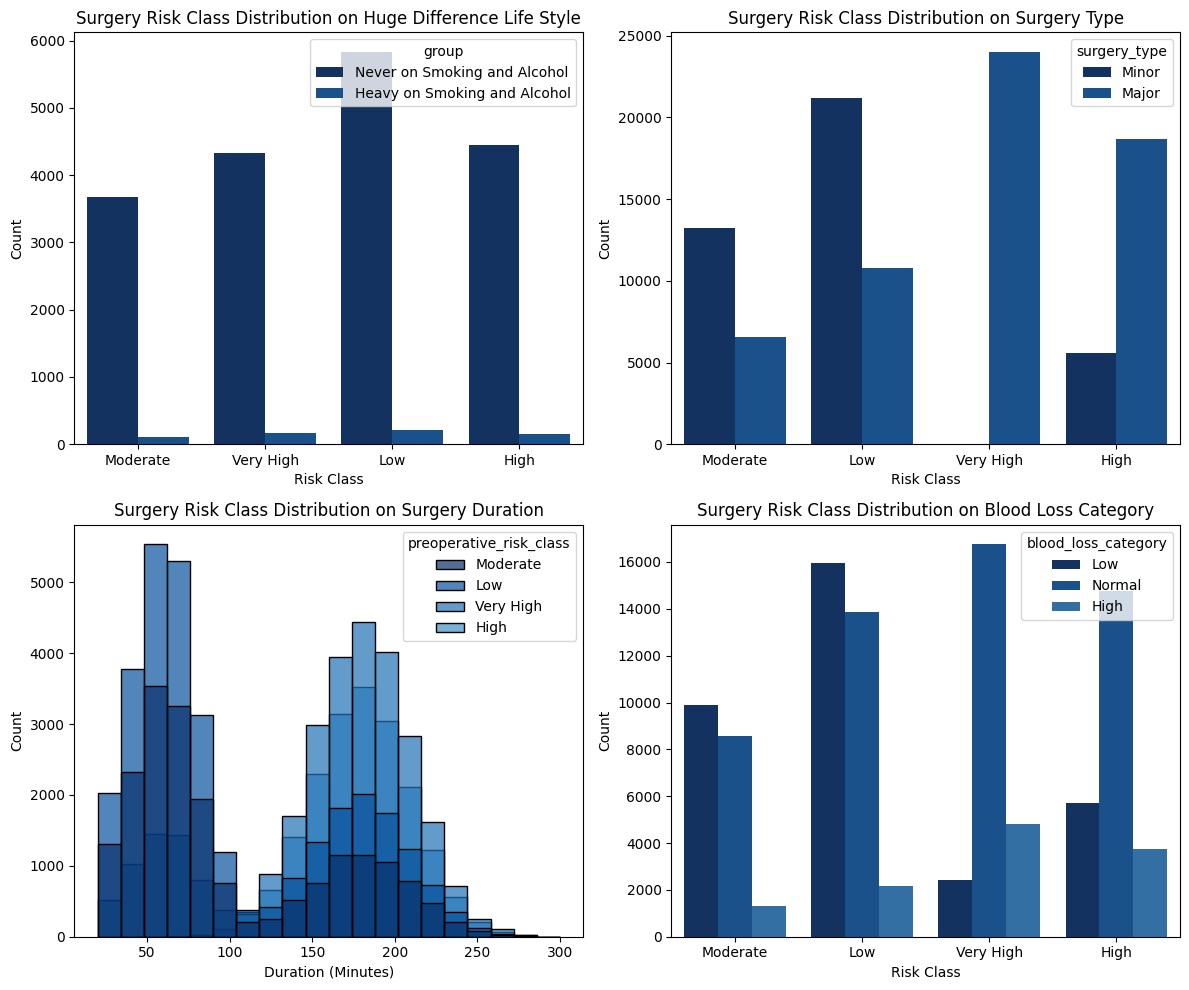

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
dark_blue_palette = ['#08306b', '#08519c', '#2171b5', '#4292c6', '#6baed6', '#9ecae1', '#c6dbef']

filtered_df = df_surgery_risk[df_surgery_risk['group'].notnull()]

# Plot 1: Distribution of Disease Group against Survival Rate
sns.countplot(ax=axes[0, 0], data=filtered_df, x='preoperative_risk_class',hue='group', palette= dark_blue_palette)
axes[0, 0].set_title('Surgery Risk Class Distribution on Huge Difference Life Style')
axes[0, 0].set_xlabel('Risk Class')
axes[0, 0].set_ylabel('Count')

# Plot 2: Histogram of Death vs Age
sns.countplot(ax=axes[0, 1], data=df_surgery_risk, x='preoperative_risk_class', hue='surgery_type',palette= dark_blue_palette)
axes[0, 1].set_title('Surgery Risk Class Distribution on Surgery Type')
axes[0, 1].set_xlabel('Risk Class')
axes[0, 1].set_ylabel('Count')

# Plot 3: Random example plot 2 (Replace with actual plot logic)
sns.histplot(ax=axes[1, 0], data=df_surgery_risk, x='surgery_duration', hue='preoperative_risk_class', kde=False, bins=20, palette= dark_blue_palette, alpha=0.7)
axes[1, 0].set_title('Surgery Risk Class Distribution on Surgery Duration')
axes[1, 0].set_xlabel('Duration (Minutes)')
axes[1, 0].set_ylabel('Count')

sns.countplot(ax=axes[1, 1], data=df_surgery_risk, x='preoperative_risk_class', hue='blood_loss_category',palette= dark_blue_palette)
axes[1, 1].set_title('Surgery Risk Class Distribution on Blood Loss Category')
axes[1, 1].set_xlabel('Risk Class')
axes[1, 1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

## Stay Cost

In [2]:
try:
    df_stay_cost = pd.read_csv('C:/Users/user/OneDrive/Documents/GitHub/TSDN-BoyWithLuv/Source/Data/patient_cost_and_stay_data.csv')
except FileNotFoundError:
    try:
        df_stay_cost = pd.read_csv('C:/Users/user/OneDrive/Documents/GitHub/TSDN-BoyWithLuv/Source/Data/patient_cost_and_stay_data.csv')
    except FileNotFoundError:
        try:
            df_stay_cost = pd.read_csv('C:\\Users\\Republic Of Gamers\\OneDrive\\Documents\\GitHub\\TSDN-BoyWithLuv\\Source\\Data\\patient_cost_and_stay_data.csv')
        except FileNotFoundError:
            df_stay_cost = None
            print("Error: Model file not found in all paths.")

In [3]:
df_stay_cost

,Unnamed: 0,patient_id,gender,age,insurance_type,smoking_status,e_cigarette_usage,alcohol_consumption_rate,previous_admission_count,surgery_name,surgery_type,surgery_duration,room_type,medical_equipment_count,stay_duration,ward_cost,surgery_cost,medication_cost,total_cost
0,0,1,Male,52,Private,Never,False,Occasional,2,Gallbladder Removal,Minor,74,Regular Ward,1,3,300.0,6455.90,105.00,7460.90
1,1,2,Female,18,Social Security Agency,Never,False,Occasional,1,Breast Cancer Surgery,Major,194,Regular Ward,3,8,300.0,21266.34,1609.47,25275.81
2,2,3,Female,46,Private,Never,False,Occasional,0,Gallbladder Removal,Minor,101,Regular Ward,0,4,300.0,5315.61,377.22,6892.83
3,3,4,Female,85,Social Security Agency,Never,False,NaN,2,Appendectomy,Minor,98,ICU,0,5,800.0,6098.06,613.54,10711.60
4,4,5,Male,21,Private,Never,False,Occasional,1,Hip Replacement,Major,165,VIP Ward,3,5,1000.0,12361.15,2384.62,19745.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,499995,499996,Female,67,Social Security Agency,Current,False,NaN,0,Hernia Repair,Minor,51,ICU,1,5,800.0,3000.00,132.85,7132.85
499996,499996,499997,Female,65,Social Security Agency,Never,False,NaN,1,Liver Transplant,Major,197,Regular Ward,2,12,300.0,12420.77,1519.81,17540.58
499997,499997,499998,Female,36,Private,Never,False,Occasional,1,Breast Cancer Surgery,Major,221,Private Ward,4,13,500.0,12020.26,1466.69,19986.95
499998,499998,499999,Female,56,Social Security Agency,Former,False,NaN,2,Knee Replacement,Major,176,Regular Ward,1,11,300.0,11255.24,1774.89,16330.13


In [4]:
df_stay_cost['alcohol_consumption_rate'] = df_stay_cost['alcohol_consumption_rate'].fillna("Never")

In [5]:
df_stay_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                500000 non-null  int64  
 1   patient_id                500000 non-null  int64  
 2   gender                    500000 non-null  object 
 3   age                       500000 non-null  int64  
 4   insurance_type            500000 non-null  object 
 5   smoking_status            500000 non-null  object 
 6   e_cigarette_usage         500000 non-null  bool   
 7   alcohol_consumption_rate  500000 non-null  object 
 8   previous_admission_count  500000 non-null  int64  
 9   surgery_name              500000 non-null  object 
 10  surgery_type              500000 non-null  object 
 11  surgery_duration          500000 non-null  int64  
 12  room_type                 500000 non-null  object 
 13  medical_equipment_count   500000 non-null  i

c:\Users\Republic Of Gamers\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Republic Of Gamers\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Republic Of Gamers\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.

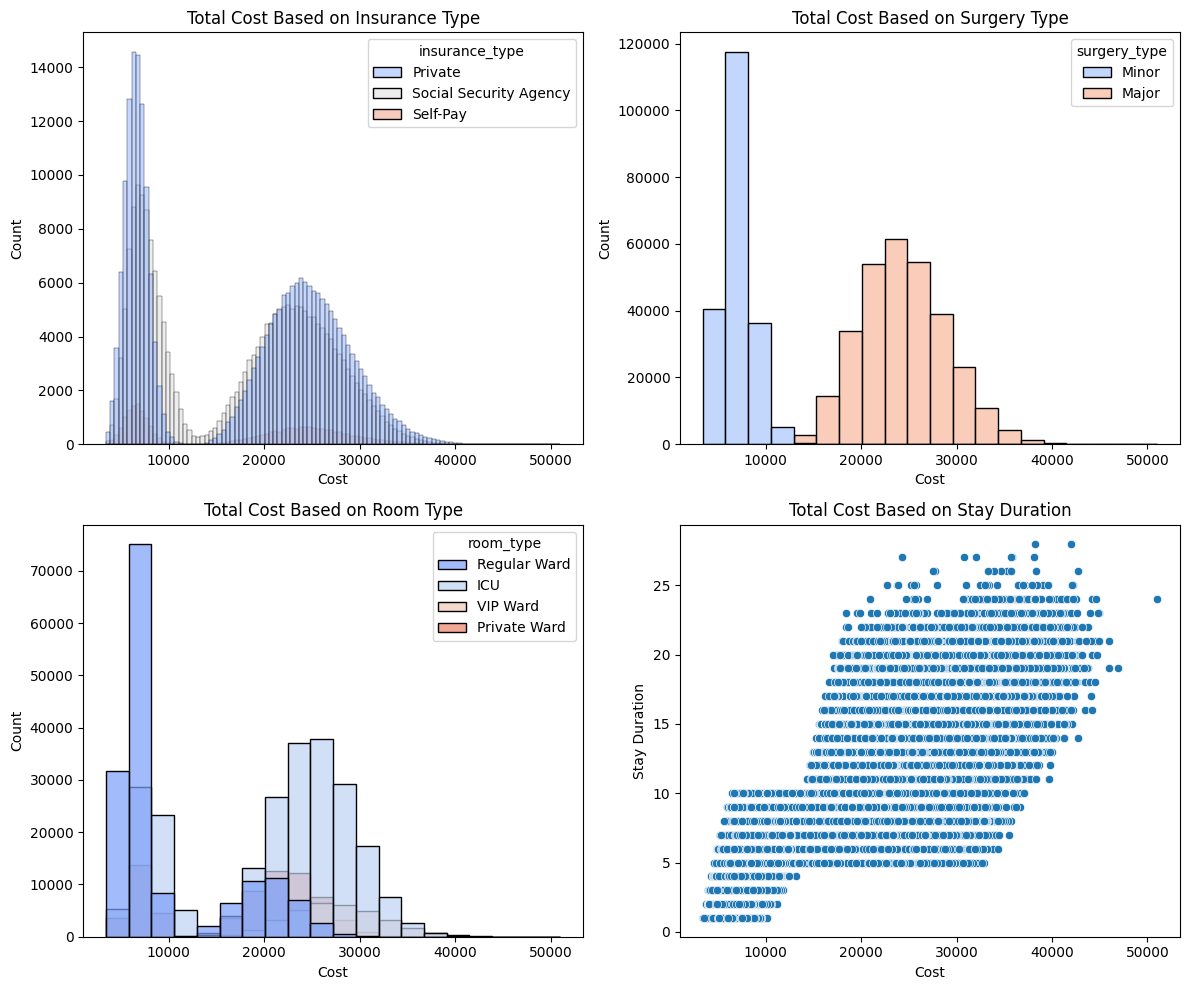

In [43]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
dark_blue_palette = ['#08306b', '#08519c', '#2171b5', '#4292c6', '#6baed6', '#9ecae1', '#c6dbef']

# Plot 1: Distribution of Disease Group against Survival Rate
sns.histplot(ax=axes[0, 0], data=df_stay_cost, x='total_cost',hue='insurance_type', palette= 'coolwarm')
axes[0, 0].set_title('Total Cost Based on Insurance Type')
axes[0, 0].set_xlabel('Cost')
axes[0, 0].set_ylabel('Count')

# Plot 2: Histogram of Death vs Age
sns.histplot(ax=axes[0, 1], data=df_stay_cost, x='total_cost', hue='surgery_type', kde=False, bins=20, palette='coolwarm', alpha=0.7)
axes[0, 1].set_title('Total Cost Based on Surgery Type')
axes[0, 1].set_xlabel('Cost')
axes[0, 1].set_ylabel('Count')

# Plot 3: Random example plot 2 (Replace with actual plot logic)
sns.histplot(ax=axes[1, 0], data=df_stay_cost, x='total_cost', hue='room_type', kde=False, bins=20, palette='coolwarm', alpha=0.7)
axes[1, 0].set_title('Total Cost Based on Room Type')
axes[1, 0].set_xlabel('Cost')
axes[1, 0].set_ylabel('Count')

# Plot 4: Random example plot 3 (Replace with actual plot logic)
sns.scatterplot(ax=axes[1, 1], data=df_stay_cost, x='total_cost', y = 'stay_duration', palette=dark_blue_palette)
axes[1, 1].set_title('Total Cost Based on Stay Duration')
axes[1, 1].set_xlabel('Cost')
axes[1, 1].set_ylabel('Stay Duration')

# Adjust layout
plt.tight_layout()
plt.show()

In [29]:
df_stay_cost['group'] = None
df_stay_cost.loc[
    (df_stay_cost['smoking_status'] == 'Current') & 
    (df_stay_cost['alcohol_consumption_rate'] == 'Heavy'), 'group'] = 'Heavy on Smoking and Alcohol'
df_stay_cost.loc[
    (df_stay_cost['smoking_status'] == 'Never') & 
    (df_stay_cost['alcohol_consumption_rate'] == 'Never'), 'group'] = 'Never on Smoking and Alcohol'

In [30]:
df_stay_cost['group'].value_counts()

group
Never on Smoking and Alcohol    120126
Heavy on Smoking and Alcohol      1788
Name: count, dtype: int64

c:\Users\Republic Of Gamers\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Republic Of Gamers\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Republic Of Gamers\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.

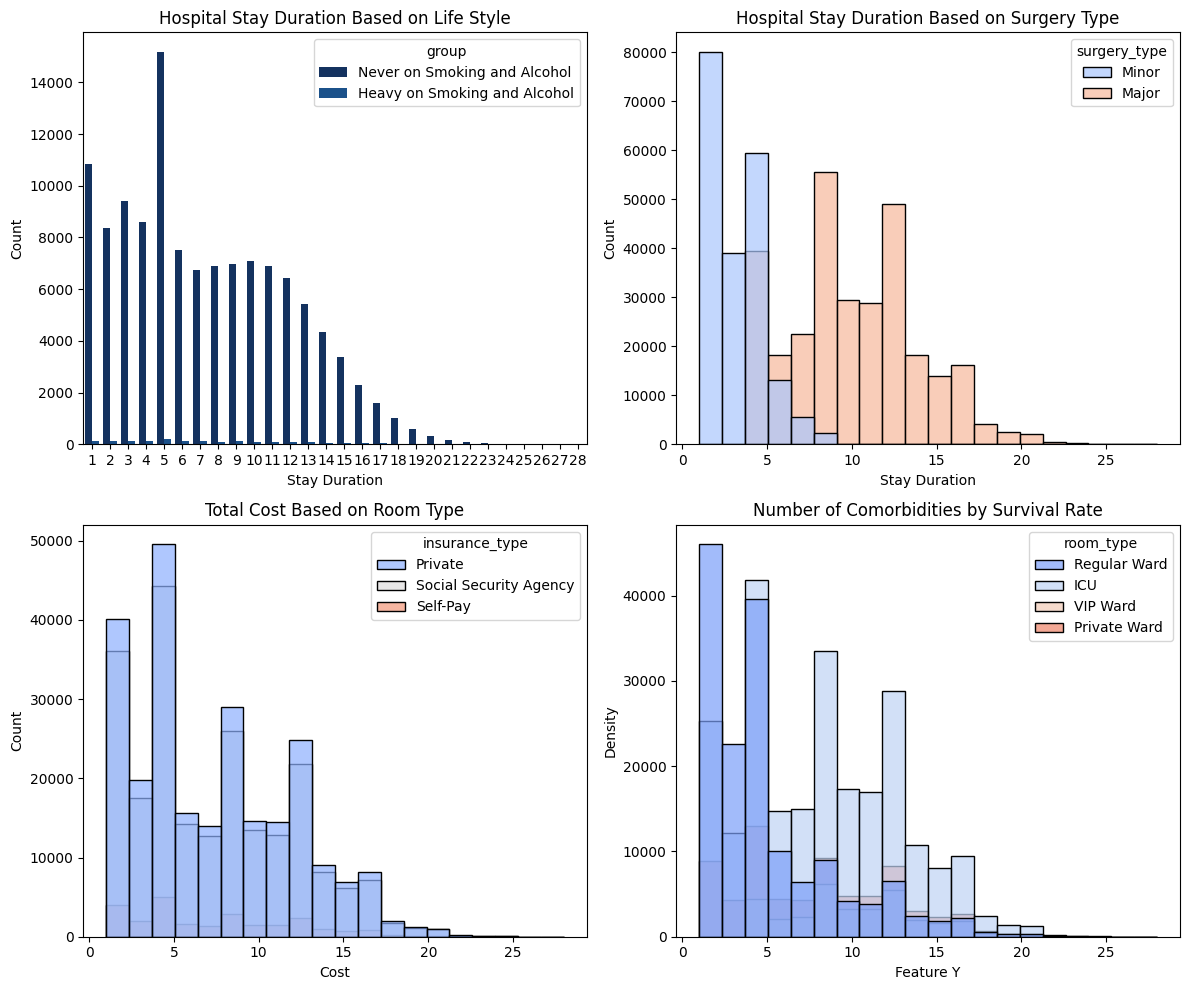

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
dark_blue_palette = ['#08306b', '#08519c', '#2171b5', '#4292c6', '#6baed6', '#9ecae1', '#c6dbef']
goodbad_palette = {
    'No': '#08306b',  # Dark Blue for 'death' = 0
    'Yes': '#e31a1c'   # Dark Red for 'death' = 1
}

# Plot 1: Distribution of Disease Group against Survival Rate
sns.countplot(ax=axes[0, 0], data=df_stay_cost, x='stay_duration',hue='group', palette= dark_blue_palette)
axes[0, 0].set_title('Hospital Stay Duration Based on Life Style')
axes[0, 0].set_xlabel('Stay Duration')
axes[0, 0].set_ylabel('Count')

# Plot 2: Histogram of Death vs Age
sns.histplot(ax=axes[0, 1], data=df_stay_cost, x='stay_duration', hue='surgery_type', kde=False, bins=20, palette='coolwarm', alpha=0.7)
axes[0, 1].set_title('Hospital Stay Duration Based on Surgery Type')
axes[0, 1].set_xlabel('Stay Duration')
axes[0, 1].set_ylabel('Count')

# Plot 3: Random example plot 2 (Replace with actual plot logic)
sns.histplot(ax=axes[1, 0], data=df_stay_cost, x='stay_duration', hue='insurance_type', kde=False, bins=20, palette='coolwarm', alpha=0.7)
axes[1, 0].set_title('Hospital Stay Duration Based on Insurance Type')
axes[1, 0].set_xlabel('Stay Duration')
axes[1, 0].set_ylabel('Count')

# Plot 4: Random example plot 3 (Replace with actual plot logic)
sns.histplot(ax=axes[1, 1], data=df_stay_cost, x='stay_duration', hue = 'room_type', kde=False, bins=20, palette='coolwarm', alpha=0.7)
axes[1, 1].set_title('Hospital Stay Duration Based on Room Type')
axes[1, 1].set_xlabel('Stay Duration')
axes[1, 1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

## Disease

In [3]:
try:
    df_disease = pd.read_excel('C:/Users/user/OneDrive/Documents/GitHub/TSDN-BoyWithLuv/Source/Data/Patients Data ( Used for Heart Disease Prediction ).xlsx')
except FileNotFoundError:
    try:
        df_disease = pd.read_excel('C:/Users/user/OneDrive/Documents/GitHub/TSDN-BoyWithLuv/Source/Data/Patients Data ( Used for Heart Disease Prediction ).xlsx')
    except FileNotFoundError:
        try:
            df_disease = pd.read_excel('C:\\Users\\Republic Of Gamers\\OneDrive\\Documents\\GitHub\\TSDN-BoyWithLuv\\Source\\Data\\Patients Data ( Used for Heart Disease Prediction ).xlsx')
        except FileNotFoundError:
            df_disease = None
            print("Error: Model file not found in all paths.")

In [4]:
df_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237630 entries, 0 to 237629
Data columns (total 35 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   PatientID                  237630 non-null  int64  
 1   State                      237630 non-null  object 
 2   Sex                        237630 non-null  object 
 3   GeneralHealth              237630 non-null  object 
 4   AgeCategory                237630 non-null  object 
 5   HeightInMeters             237630 non-null  float64
 6   WeightInKilograms          237630 non-null  float64
 7   BMI                        237630 non-null  float64
 8   HadHeartAttack             237630 non-null  int64  
 9   HadAngina                  237630 non-null  int64  
 10  HadStroke                  237630 non-null  int64  
 11  HadAsthma                  237630 non-null  int64  
 12  HadSkinCancer              237630 non-null  int64  
 13  HadCOPD                    23

In [8]:
df_disease['HadHeartAttack'] = df_disease['HadHeartAttack'].replace({0: 'No', 1: 'Yes'})
df_disease['HadAngina'] = df_disease['HadAngina'].replace({0: 'No', 1: 'Yes'})
df_disease['HadArthritis'] = df_disease['HadArthritis'].replace({0: 'No', 1: 'Yes'})
df_disease['HadDepressiveDisorder'] = df_disease['HadDepressiveDisorder'].replace({0: 'No', 1: 'Yes'})
df_disease['HadSkinCancer'] = df_disease['HadSkinCancer'].replace({0: 'No', 1: 'Yes'})
df_disease['HadStroke'] = df_disease['HadStroke'].replace({0: 'No', 1: 'Yes'})

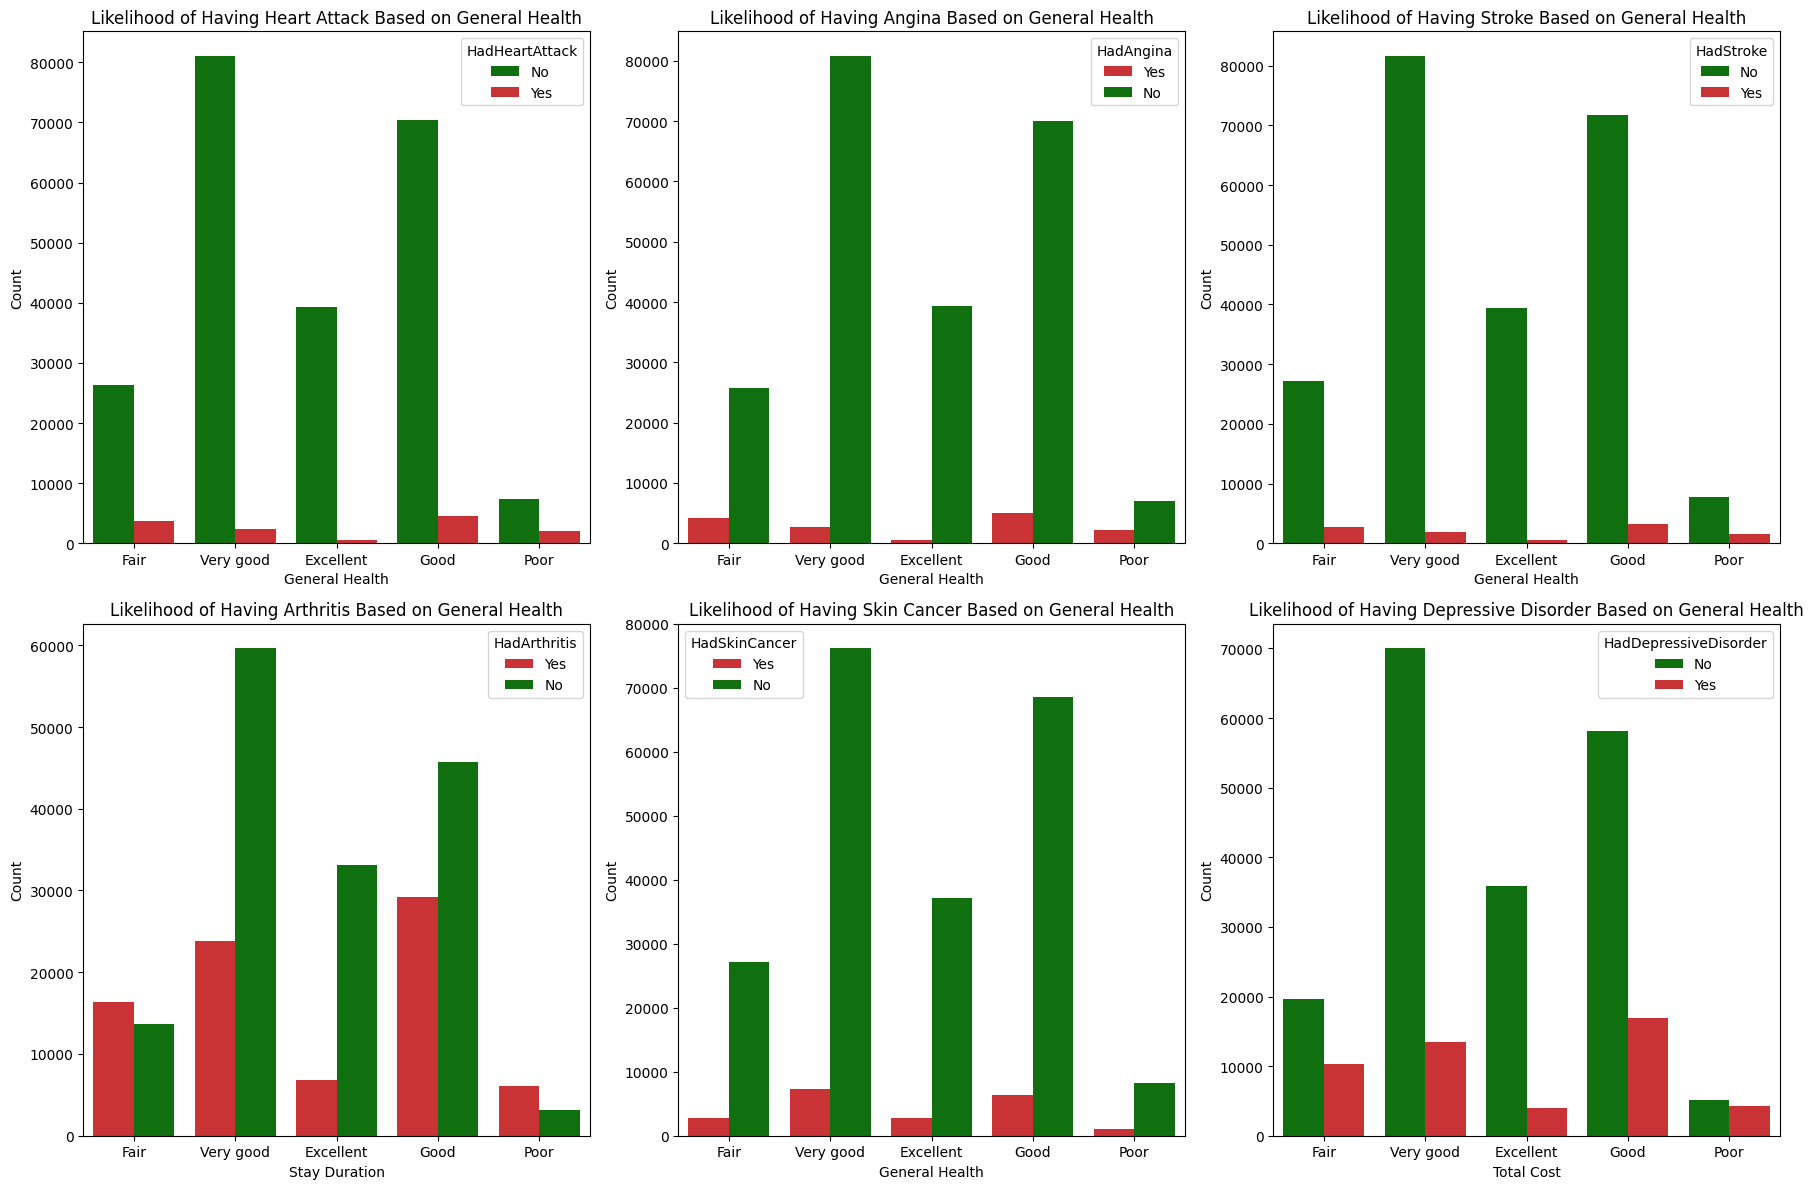

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # Create a 2 x 3 grid with appropriate figure size
dark_blue_palette = ['#08306b', '#08519c', '#2171b5', '#4292c6', '#6baed6', '#9ecae1', '#c6dbef']
goodbad_palette = {
    'No': '#008000',  # Dark Green for 'death' = 0
    'Yes': '#e31a1c'  # Dark Red for 'death' = 1
}

# Plot 1: Distribution of Disease Group against Survival Rate
sns.countplot(ax=axes[0, 0], data=df_disease, x='GeneralHealth', hue='HadHeartAttack', palette=goodbad_palette)
axes[0, 0].set_title('Likelihood of Having Heart Attack Based on General Health')
axes[0, 0].set_xlabel('General Health')
axes[0, 0].set_ylabel('Count')

# Plot 2: Likelihood of Angina Based on General Health
sns.countplot(ax=axes[0, 1], data=df_disease, x='GeneralHealth', hue='HadAngina', palette=goodbad_palette)
axes[0, 1].set_title('Likelihood of Having Angina Based on General Health')
axes[0, 1].set_xlabel('General Health')
axes[0, 1].set_ylabel('Count')

# Plot 3: Hospital Stay Duration Based on Insurance Type
sns.countplot(ax=axes[0, 2], data=df_disease, x='GeneralHealth', hue='HadStroke',palette=goodbad_palette)
axes[0, 2].set_title('Likelihood of Having Stroke Based on General Health')
axes[0, 2].set_xlabel('General Health')
axes[0, 2].set_ylabel('Count')

# Plot 4: Hospital Stay Duration Based on Room Type
sns.countplot(ax=axes[1, 0], data=df_disease, x='GeneralHealth', hue='HadArthritis', palette=goodbad_palette)
axes[1, 0].set_title('Likelihood of Having Arthritis Based on General Health')
axes[1, 0].set_xlabel('General Health')
axes[1, 0].set_ylabel('Count')

# Plot 5: Placeholder for another plot (Replace with actual logic)
sns.countplot(ax=axes[1, 1], data=df_disease, x='GeneralHealth', hue='HadSkinCancer', palette=goodbad_palette)
axes[1, 1].set_title('Likelihood of Having Skin Cancer Based on General Health')
axes[1, 1].set_xlabel('General Health')
axes[1, 1].set_ylabel('Count')

# Plot 6: Placeholder for another plot (Replace with actual logic)
sns.countplot(ax=axes[1, 2], data=df_disease, x='GeneralHealth', hue='HadDepressiveDisorder', palette=goodbad_palette)
axes[1, 2].set_title('Likelihood of Having Depressive Disorder Based on General Health')
axes[1, 2].set_xlabel('General Health')
axes[1, 2].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()
